#  Use effective heuristics for alpha sizing

In [1]:
%load_ext autoreload 
%autoreload 2
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append('../')

## Background

$$
r = \alpha + \sum_{k=1}^K\beta_k f_k +\epsilon
$$
where:
- $r$: stock total return 
- $\alpha+\epsilon$: stock idiosynchratic return 
- $\beta_k f_k$:  stock portion of return coming from factor $k$
- $\mathbb{Var}(\epsilon)$ the idio-syncratic risk
- The Net Market Value, or NMV, is the signed dollar holding value of security held
in a portfolio.

- The Gross Market Value (GMV) of a stock is the absolute value of the Net Market
Value. The GMV of a portfolio is the sum of the GMVs of the individual positions



## Sharpe Ratio

- **Sharpe ratio**
$$
\text{SR} = \frac{\mathbb{E}(r-r_f)}{\sqrt{\mathbb{Var}(r-r_f)}} \approx  \frac{\mathbb{E}(r)}{\sqrt{\mathbb{Var}(r)}}
$$
where $r_f$ is risk free rate.

- The intuition for the Sharpe Ratio is that it provides a "risk-adjusted" measure of performance, compared to return. 
- If volatility is a yardstick for risk, then Sharpe Ratio is return measured in units of volatility. 
- If you buy $n$ units of volatility, the Sharpe Ratio tells you what payoff you receive.

- **Information Ratio**
$$
\text{IR} = \frac{\mathbb{E}(r-r_b)}{\sqrt{\mathbb{Var}(r-r_b)}}
$$
where $r_b$ is the return of an arbitrary benchmark

Advantages:
- The intuition of the metric is clear. 
- Return on GMV is performance relative to a
capital budget. 
- But the real scarce resource is not capital; it is risk.
- If your strategy has a high Sharpe Ratio, and low risk/GMV ratio,
you can increase its leverage in order to bring its expected return
to acceptable levels. 
- Aside from fundamental investing, there are
many relative-value strategies with high Sharpe and low risk/GMV
ratio. 
- In the absence of leverage (i.e., the ability to borrow additional
capital against collateral at sufficiently low rates), these strategies
would not be feasible; in the real world, they are implemented and
often are extremely profitable.
    

Limitations:
- volatility is not the same as risk 
- doesn't distinguish between upside and downside risk 

However:
- Still widely adopted by the industry 

## Estimating Expected Returns 

What is relevant here is that the returns be expressed as:
- idiosyncratic returns; 
- in expectation;
- over a common investment horizon for all the stocks under coverage


For each stock in your universe:
1. Set an investment horizon $T$, and a price forecast at that
horizon.
2. Compute the forecasted total return at that horizon 
$$r_{\text{total}} = \frac{\text{price forecast}}{\text{current price}} − 1$$
3. Estimate industry returns rindustry over the same horizon.
4. Estimate forecasted idiosyncratic return 
$$r_{\text{idio}} = r_{\text{total}} − r_{\text{industry}}$$


Convert all the expected returns to the same investment horizon
by dividing the return by the horizon: 

$$ \alpha = \frac{r}{T} $$

## Risk Based Sizing

### Guiding principles 

We choose the sizing candidates based on three criteria:
- The first one is simplicity. The rules need only two inputs (at most): expected returns and volatilities, combined via simple ratios. 
- The second one is practical relevance. The rules must be widely in use, if not in the fundamental investing community, in the quantitative one. 
- Lastly, we require that the rules be principled.

### Methods

#### Proportional Rule

The Proportional Rule for portfolio construction is a straightforward approach where the allocation of assets is directly proportional to the strength of the buy or sell signals. 

1. **Basic Concept**: 
   - Positions in the portfolio are allocated proportionally to the investor's buy-or-sell view on each asset.
   - For example, if an investor has a stronger conviction for buying Asset A compared to Asset B, then a larger proportion of the portfolio will be allocated to Asset A.

2. **Ignorance of Other Factors**: 
   - This rule does not consider the relative size of the conviction beyond the directional view (buy or sell).
   - It also ignores the volatility of the assets, which is a key factor in many other portfolio construction methods.

A particular case of the proportional rule is the $\frac{1}{N}$ rule: 
   - The "1/N" rule is an even simpler variant of the Proportional Rule.
   - Here, the portfolio is divided equally among N assets, regardless of the investor's views on each asset.
   - If there are 10 assets in the portfolio, each asset will receive 10% of the total investment.


Comparison and Analysis

- **Advantages**:
  - Simplicity: Both rules are easy to understand and implement.
  - Reduced Complexity: They require less computational effort compared to more sophisticated methods that consider risk and return optimization.

- **Disadvantages**:
  - Ignoring Volatility: By not accounting for asset volatility, these methods can lead to suboptimal risk-adjusted returns.
  - No Differentiation: The 1/N rule, in particular, fails to leverage any information about the investor's confidence in their buy or sell signals.
 
- **Analysis by DeMiguel et al. (2009)**:
- DeMiguel, Garlappi, and Uppal (2009) conducted a detailed analysis of the 1/N rule in their paper "Optimal versus Naive Diversification: How Inefficient is the 1/N Portfolio Strategy?"
- Their research found that, surprisingly, the 1/N rule can often perform comparably to more complex optimization strategies in terms of out-of-sample performance.
- This finding highlights the challenges and potential pitfalls of overfitting in more sophisticated portfolio optimization methods.

 

#### The Risk Parity (RP) Rule

- The objective is to size the positions in the portfolio such that the dollar idiosyncratic volatility contribution of each position is equal.
- This means each asset's unique risk (idiosyncratic volatility) will impact the portfolio equally in dollar terms.
- For each asset $i$, the product of its Gross Market Value (GMV) and its percentage idiosyncratic volatility should be a constant.
- Mathematically: 
$$\text{GMV}_i \times \% \text{idiosyncratic volatility}_i = \text{constant} $$
$$\text{GMV}_i = \frac {\text{constant}} {\% \text{idiosyncratic volatility}_i}$$
$$w_i = \frac { \frac{1}{\sigma_i} } {  \sum_{j=1}^N  \frac{1}{\sigma_i} }$$




#### The Mean-Variance (MV) Optimal Rule

We consider a factor model framework with $n$ assets and $m$ factors, where time is discrete. The master equation for asset returns is given by:

$$ r_t = \alpha + \beta_t f_t + \epsilon_t $$

where:
- $ r_t $ is an $ n $-dimensional vector of asset total returns,
- $ \alpha $ is an $ n $-dimensional vector of expected returns,
- $ \epsilon_t $ is an $ n $-dimensional vector of asset idiosyncratic returns,
- $ f_t $ is an $ m $-dimensional vector of factor returns,
- $ \beta_t $ is an $ n \times m $ matrix of factor loadings.


Consider the usual factor model with excess returns $ \alpha$ and covariance matrix $$ \Sigma_r = \beta \Sigma_f \beta^{T} + \Sigma_\epsilon $$. 

The mean-variance problem is:

$$ \max{\alpha^{T} x - \frac{1}{2} \rho x^{T} \Sigma_r x} $$

which is solved by $$ x = \rho \Sigma_r^{-1} \alpha $$ 
where $\rho$ is the risk aversion parameter.



#### The Shrinked Mean-Variance (SMV) Optimal Rule 

Here we follow the simple approach of [Stubbs and Vance, 2005] to justify the empirical observation that using a shrinked covariance matrix outperforms the naïve approach. 

Let $ \alpha \sim N(\mu_\alpha, \Sigma_\alpha) $. 

The mean-variance optimization problem now has an additional term generated by alpha’s randomness:

$$ \max \mathbb{E}[(\alpha + \beta f+\epsilon)^{T} x] - \frac{1}{2\rho} \sqrt{\mathbb{Var}[(\alpha + \beta f + \epsilon)^{T} x]} $$

This is equal to:

$$ \max \mu_{\alpha}^{T} x - \frac{1}{2\rho} x^{T} (\Sigma_\alpha + \Sigma_r) x $$

Hence the solution is given by:

$$ x = \rho (\Sigma_\alpha + \Sigma_r)^{-1} \mu_\alpha $$

And the optimum is:

$$ \frac{\rho}{2} \mu'_{\alpha} (\Sigma_\alpha + \Sigma_r)^{-1} \mu_\alpha $$

If $ \Sigma_\alpha = \tau^2 I $, then the solution is given by:
$$ x = \rho (\Sigma_r + \tau^2 I)^{-1} \mu_\alpha $$ 
If we add the constraint $ \beta^T x = 0 $ (no factor risk), the solution simplifies to:

$$ x_i = \frac{\mu_{\alpha, i}}{[\sigma_\epsilon^2]_i + \tau^2} $$

For $ \tau = 0 $, this gives the MVO sizing rule; for $ \tau \rightarrow \infty $ this gives the equal-sized rule.


## Empirical Analysis of the Sizing rules 

#### Simulated data: Un-intuitive Minimum Variance MVO


- **Simulation Setup**:
  - Simulate daily returns for 100 uncorrelated stocks with identical volatilities over 6 months (126 trading days).
  - Estimate volatilities from the simulated daily returns.
  - Construct a diagonal covariance matrix using the estimated volatilities.
  - Compute minimum variance portfolio weights using the formula  
  $$w_{\text{mv}} = \frac{\Sigma^{-1} \mathbf{1}}{\mathbf{1}^T \Sigma^{-1} \mathbf{1}}$$
  - Sort the computed portfolio weights from least to highest for visualization.


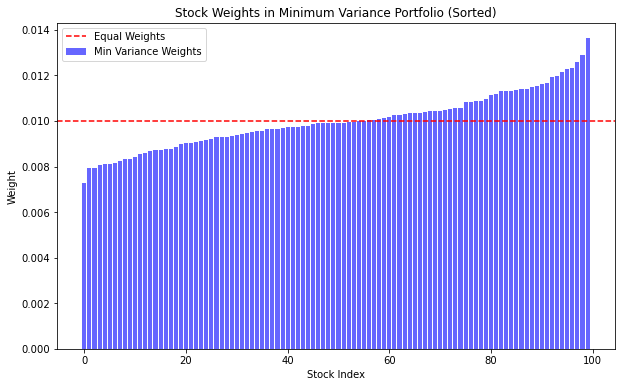

Average oversizing or undersizing: 9.41%
Number of stocks with mis-sizing in excess of 20%: 9


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_stocks = 100
num_days = 126  # 6 months of trading days
true_volatility = 0.02  # Daily volatility

# Simulate daily returns for 100 uncorrelated stocks with identical volatilities
returns = np.random.normal(loc=0, scale=true_volatility, size=(num_days, num_stocks))

# Estimate volatilities using daily returns over the past six months
estimated_volatility = np.std(returns, axis=0)

# Covariance matrix for uncorrelated returns
cov_matrix = np.diag(estimated_volatility**2)

# Minimum Variance Portfolio Weights (Closed-Form Solution)
ones = np.ones(num_stocks)
inv_cov_matrix = np.linalg.inv(cov_matrix)
min_var_weights = inv_cov_matrix @ ones / (ones.T @ inv_cov_matrix @ ones)

# Sort weights for plotting
sorted_indices = np.argsort(min_var_weights)
sorted_weights = min_var_weights[sorted_indices]

# Compare to equal-weight portfolio
equal_weights = np.array([1/num_stocks] * num_stocks)

# Calculate mis-sizing
mis_sizing = (min_var_weights - equal_weights) / equal_weights

# Analyze results
average_mis_sizing = np.mean(np.abs(mis_sizing))
num_large_mis_sizing = np.sum(np.abs(mis_sizing) > 0.20)

# Plot the sizes of the stocks in the Minimum Variance Portfolio
plt.figure(figsize=(10, 6))
plt.bar(range(num_stocks), sorted_weights, color='blue', alpha=0.6, label='Min Variance Weights')
plt.axhline(y=1/num_stocks, color='red', linestyle='--', label='Equal Weights')
plt.xlabel('Stock Index')
plt.ylabel('Weight')
plt.title('Stock Weights in Minimum Variance Portfolio (Sorted)')
plt.legend()
plt.show()

print(f"Average oversizing or undersizing: {average_mis_sizing * 100:.2f}%")
print(f"Number of stocks with mis-sizing in excess of 20%: {num_large_mis_sizing}")


#### Realistic experiment

***Data Selection***
- **Time Period**: 1998–2019 (22 years).
- **Universe**: Companies in the Russell 3000 index.
- **Liquidity Filter**: Only include companies with an average daily trading volume over the previous month of $2M or more.

***Investment Horizon***
- **Frequency**: Monthly rebalancing.
- **Horizon**: One-month investment periods.

***Alpha Signal Generation***
- **Within-Sector Signals**: Generate alpha signals for each sector.
- **Correlation**: Signals have a positive cross-sectional correlation (5%) with the following one-month returns.
- **Methods to Generate Alpha Signals**:
  1. **Normal Distribution**:
     - Draw alpha signals from a normal distribution. This mimics the empirical distribution of signals generated by portfolio managers (PMs).
  2. **Simple Buy/Sell Signals**:
     - Use binary signals with values of 1 or -1, representing buy and sell signals, respectively. These signals do not account for the strength of the conviction.

***Portfolio Construction***
- **Portfolio Sizes**: Construct portfolios with 50, 100, and 200 stocks.
- **Rules Used**: Apply the four portfolio construction rules defined in  the previous section.
- **Unit Gross Market Value (GMV)**: Ensure the total GMV is normalized to 1.

***Performance Evaluation***
- **Metric**: Estimate the Sharpe Ratio for each portfolio.
  - **Sharpe Ratio**: A measure of risk-adjusted return calculated as the ratio of portfolio excess return over its standard deviation.
- **Industry Analysis**: Evaluate the Sharpe Ratios for each industry.

***Simulation and Averaging***
- **Simulations**: Repeat the process over a large number of simulated alpha signals.
- **Averaging**: Average the Sharpe Ratios across simulations to obtain robust performance metrics.



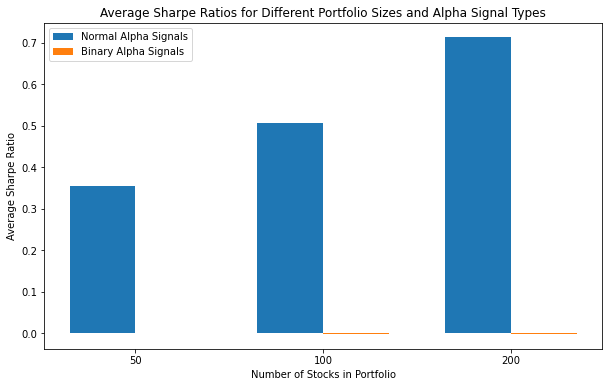

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parameters
num_stocks_options = [50, 100, 200]
investment_period = 22 * 12  # 22 years of monthly periods
signal_corr = 0.05
num_simulations = 1000

# Function to simulate alpha signals and returns
def generate_signals_and_returns(num_stocks, period_length, signal_corr):
    # Simulate alpha signals
    alpha_signals_normal = np.random.normal(0, 1, size=(period_length, num_stocks))
    alpha_signals_binary = np.random.choice([1, -1], size=(period_length, num_stocks))

    # Simulate future returns with given correlation
    returns = (signal_corr * alpha_signals_normal +
               np.sqrt(1 - signal_corr**2) * np.random.normal(0, 1, size=(period_length, num_stocks)))

    return alpha_signals_normal, alpha_signals_binary, returns

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    mean_return = np.mean(returns, axis=0)
    std_return = np.std(returns, axis=0)
    sharpe_ratio = mean_return / std_return
    return sharpe_ratio

# Main simulation loop
sharpe_ratios_results = {num_stocks: {'normal': [], 'binary': []} for num_stocks in num_stocks_options}

for num_stocks in num_stocks_options:
    for _ in range(num_simulations):
        alpha_normal, alpha_binary, future_returns = generate_signals_and_returns(num_stocks, investment_period, signal_corr)

        # Evaluate portfolios for both types of alpha signals
        portfolio_returns_normal = np.mean(future_returns * alpha_normal, axis=1)
        portfolio_returns_binary = np.mean(future_returns * alpha_binary, axis=1)

        sharpe_normal = calculate_sharpe_ratio(portfolio_returns_normal)
        sharpe_binary = calculate_sharpe_ratio(portfolio_returns_binary)

        sharpe_ratios_results[num_stocks]['normal'].append(sharpe_normal)
        sharpe_ratios_results[num_stocks]['binary'].append(sharpe_binary)

# Calculate average Sharpe Ratios
avg_sharpe_ratios = {num_stocks: {'normal': np.mean(sharpe_ratios_results[num_stocks]['normal']),
                                  'binary': np.mean(sharpe_ratios_results[num_stocks]['binary'])}
                     for num_stocks in num_stocks_options}

# Plotting the results
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
width = 0.35
indices = np.arange(len(num_stocks_options))

avg_normal = [avg_sharpe_ratios[num_stocks]['normal'] for num_stocks in num_stocks_options]
avg_binary = [avg_sharpe_ratios[num_stocks]['binary'] for num_stocks in num_stocks_options]

ax.bar(indices - width/2, avg_normal, width, label='Normal Alpha Signals')
ax.bar(indices + width/2, avg_binary, width, label='Binary Alpha Signals')

ax.set_xlabel('Number of Stocks in Portfolio')
ax.set_ylabel('Average Sharpe Ratio')
ax.set_title('Average Sharpe Ratios for Different Portfolio Sizes and Alpha Signal Types')
ax.set_xticks(indices)
ax.set_xticklabels(num_stocks_options)
ax.legend()

plt.show()


key findings: 
- first, alpha sizing significantly impacts the Sharpe Ratio, with potential gains or losses of 10 to 30 points in relative performance based on the method used. 
- Second, the naive mean-variance (MV) portfolio construction performs poorly, especially with gaussian and buy/sell signals, achieving only 34% and 35% of the performance of other methods. 
- third, Shrinked Mean-Variance with sector volatility performs comparably to the Proportional method.
    - Why is this the case? 
    - One possibility is that estimation error of volatilities plays a role. To test if volatility estimation error is the issue, we do not use the predicted volatilities  but instead the realized volatility during the investment month for which we created the portfolio.

- The Sharpe Ratios do not differ significantly between using predicted volatilities and realized volatilities. 
- This indicates that volatility estimation error is not the primary issue affecting portfolio performance. 
- Instead, the underlying problem is a more subtle effect related to how volatility scaling is applied.
- To understand this subtle effect, a controlled experiment is needed  allowing a precise control over the dispersion of stock volatilities in the investment universe, which is not possible with historical data. 
- By manipulating the volatility dispersion, researchers can isolate and study the impact of volatility scaling on portfolio performance more accurately.

 



1. **Two Investment Universes**:
   - **First Universe**: 100 stocks with equal volatilities of 25%.
   - **Second Universe**: 100 stocks split equally between:
     - Half with volatility of 40%.
     - Half with volatility of 10%.

2. **Expected Return Forecasting**:
   - Forecasted expected returns for each stock have a noise component, leading to realized returns that are on average 5% off from the forecast.

3. **Impact of Volatility on Sizing Decisions**:
   - In the first universe, since all stocks have the same volatility (25%), sizing decisions are primarily based on expected returns.
   - In the second universe, where volatilities vary (40% and 10%), sizing decisions become asymmetric:
     - Low-volatility stocks are sized larger than high-volatility stocks, especially pronounced with Mean-Variance (MV) scaling.

4. **Calculation of Misallocation Due to Forecast Error**

    - **First Universe** (All stocks at 25% volatility):
      - Average NMV misallocation due to 5% forecast error:
    $$
        \text{Misallocation} = \frac{0.05}{0.25^2} = 0.8
      $$

    - **Second Universe** (Half at 40%, half at 10% volatility):
      - Average NMV misallocation due to 5% forecast error:
     $$
        \text{Misallocation} = \left(\frac{1}{2}\right) \times \frac{0.05}{0.1^2} + \left(\frac{1}{2}\right) \times \frac{0.05}{0.4^2} = 2.65
       $$
      - This represents a 332% increase in misallocation compared to the first universe due to volatility asymmetry.

    - **Impact of Estimation Errors**: The critical factor affecting portfolio performance is not volatility estimation error but rather the accuracy of expected return forecasts.
    - **Asymmetric Costs**: In portfolios with varying volatilities, forecast errors in low-volatility stocks incur higher costs compared to errors in high-volatility stocks, especially under Mean-Variance scaling.
5. **Realistic Simulation Results**:
  - 4000 simulations with 100 stocks over 3 years, where average volatility is 30% with varying dispersion.
  - Results show that as volatility dispersion increases:
    - Proportional rule performs better.
    - Risk Parity degrades less.
    - Mean-Variance, with or without foresight, underperforms due to its sensitivity to volatility and return estimation errors.



## From Ideas to Positions 

| Stock | Expected Return (%) | NMV  |
|-------|---------------------|------|
| ADBE  | 7.8                 | 123.3|
| MSFT  | -0.8                | -13.2|
| CSCO  | 2.4                 | 38.2 |
| IBM   | -5.3                | -83.5|
| NVDA  | 0.3                 | 5.0  |
| INTC  | -3.3                | -51.9|


In [27]:
expected_returns = [7.8 ,
 -0.8 ,
 2.4 ,
 -5.3 ,
 0.3 ,
 -3.3 ]

In [30]:
def compute_kappa(target_gmv, expected_returns):
    """
    Compute the constant kappa such that the portfolio's GMV meets the predefined target.
    
    Args:
    - target_gmv (float): Target Gross Market Value (GMV) of the portfolio.
    - expected_returns (list): List of expected returns for each asset in the portfolio.
    
    Returns:
    - kappa (float): Constant kappa for scaling the expected returns to achieve the target GMV.
    """
    total_expected_return =  pd.Series(expected_returns).abs().sum()
    kappa = target_gmv / total_expected_return
    return kappa

 

In [32]:
kappa=compute_kappa(315, expected_returns)

In [33]:
[kappa*r for r in expected_returns]

[123.46733668341706,
 -12.663316582914572,
 37.98994974874371,
 -83.89447236180904,
 4.748743718592964,
 -52.236180904522605]


- **Scaling Positions**: 
  - Convert expected returns into Net Market Values (NMVs) by multiplying by $\kappa=15.8$ to achieve a target Gross Market Value (GMV) of $\$315M$.
  $$ \kappa = \frac{\text{Target GMV}}{\sum_i\alpha_i} $$
  
- **Factor Risk Concerns**: 
  - Simple scaling can lead to significant factor risk in the portfolio, such as market beta and momentum exposure.
  
- **Achieving Factor Neutrality**: 
  - Modify positions to minimize changes from original convictions while ensuring zero exposure to factors like market beta and momentum.
  
- **Rule of Thumb Approach**: 
  - Initially transforms raw investment ideas into factor-neutral positions, aiming to minimize disruption to original strategies.



**Sizing Alphas into Positions, with Zero Factor Risk**

You are given a factor loadings matrix $ B$ with a number of rows equal to the number of stocks in the estimation universe (e.g., 2000 for the US), and a number of columns equal to the number of factors. The expected returns are collected in a vector $ \boldsymbol{\alpha} $. You have a known target GMV for your portfolio.

1. **Regress the column $ \boldsymbol{\alpha} $ against the columns of $B$**:
 $$ \boldsymbol{\alpha} = B \mathbf{x} + \boldsymbol{\epsilon}$$ 
  where $ \boldsymbol{\epsilon} $ is the vector of residuals of the linear regression.

2. **Standardize the vector $ \boldsymbol{\epsilon} $**:
   $$a_i = \frac{\epsilon_i}{\sum_i |\epsilon_i|} $$ 
   where $ i $ denotes the $ i $-th stock in your portfolio

3. **Set the Net Market Value (NMV) of stock $ i $**:
   $$ \text{NMV}_i = a_i \times \text{GMV} $$ 

 

## Time-Series Risk-Based Portfolio Targeting 


  - **Volatility Sizing**: Portfolio sizing decisions are fundamentally decisions about managing volatility. Each position's volatility is considered when sizing the portfolio.
  - **Dynamic Nature**: Portfolio sizing isn't static; it varies daily due to tactical trading decisions such as opening, adjusting, or closing positions. Despite these variations, it generally remains within a range unless exceptional events occur.
  - **Target Options**: Practitioners commonly target Gross Market Value (GMV) or portfolio volatility. Volatility targeting has gained attention due to its perceived advantages.
  - **Advantages of Volatility Targeting**:
    - **Better Risk Measure**: Volatility reflects portfolio risk more accurately than GMV, especially over time periods with varying market conditions.
    - **Potential for Improved Performance**: By targeting volatility, managers may enhance the Sharpe Ratio or return on GMV. Volatility tends to be persistent, allowing managers to adjust risk levels in response to expected market conditions.
  - **Considerations**:
    - **Impact on Profitability**: Managers aren't typically rewarded for volatility management unless it enhances profitability. Managing volatility spikes might stabilize future risks without significantly impacting profitability.
    - **Complexities and Risks**: Derisking strategies might inadvertently reduce profitability if not managed carefully. High volatility spikes often correlate with PnL losses, and managing volatility might affect subsequent PnL outcomes.



- **Objective**: The study seeks empirical evidence to validate volatility targeting strategies.
- **Focus**: Emphasis on idiosyncratic volatility management, aligning with the earlier discussed separation of concerns.
- **Experimental Design**:
    1. **Signal Types**: Tests conducted using both normal distribution signals and simple buy/sell signals.
    2. **Signal Horizons**: Evaluation of short-term (one month ahead) and longer-term (three months ahead) signals to account for potential profit and loss (PnL) reversion post-volatility spikes.
    3. **Portfolio Breadth**: Analysis across portfolios of varying sizes - 50, 100, and 200 stocks.
    4. **Sector-specific Analysis**: Assessing the impact of targeting strategies within different sectors.
- **Simulation Details**:
    - Conducted 50 simulations for the period 1998–2019 on US stocks.
    - Daily targeting of GMV and volatilities during simulations.
    - Acknowledgement of potential time and cost implications, suggesting daily procedures as a reasonable approximation despite possible alternatives like monthly targeting.


## Appendix

 

Given:
- Excess returns: $ \alpha $
- Covariance matrix of returns: $ \Sigma_r = \beta \Sigma_f \beta^T + \Sigma_\epsilon $
- Risk aversion parameter: $ \rho $

Let's solve the mean-variance optimization problem is:
$$ \max_{x} \alpha^T x - \frac{1}{2} \rho x^T \Sigma_r x $$
subject to 

$$ x^T 1 = 1 $$

We can write the Langragian as:
$$ \mathcal{L}(x, \lambda) = \alpha^T x - \frac{1}{2} \rho x^T \Sigma_r x + \lambda (x^T 1 - 1) $$
where $ \lambda $ is the Lagrange multiplier for the constraint $ x^T 1 = 1 $

To find the optimal $ x $, let's take the derivative of $ \mathcal{L} $ with respect to $ x $ and set it to zero:
$$ \frac{\partial \mathcal{L}}{\partial x} = \alpha - \rho \Sigma_r x + \lambda 1 = 0 $$

From the first-order condition:
$$ \alpha = \rho \Sigma_r x - \lambda 1 $$

Multiply both sides by $ \Sigma_r^{-1} $:
$$ \Sigma_r^{-1} \alpha = \rho x - \Sigma_r^{-1} \lambda 1 $$
Transposing both sides: 
$$ \alpha^T\Sigma_r^{-1}  = \rho x^T - 1^T\Sigma_r^{-1} \lambda  $$
Multiply by the unit vector
$$ \alpha^T\Sigma_r^{-1}1  = \rho x^T1 - 1^T\Sigma_r^{-1}1 \lambda  $$
and using  $ x^T 1 = 1 $, yields $ \lambda $ would be chosen such that 
$$ \lambda = \frac{\rho-\alpha^T \Sigma_r^{-1} 1 } {(1^T \Sigma_r^{-1} 1)} $$ 

Therefore:
$$ x = \rho \Sigma_r^{-1} \alpha $$

 